In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
cwd=os.getcwd()
print(cwd)
print("Training-Left:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Left')))))
print("Training-Right:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Right')))))
print("Training-Straight:"+str(len(os.listdir(os.path.join(cwd,'figtmp/training/Straight')))))
print("Testing-Left:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Left')))))
print("Testing-Right:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Right')))))
print("Testing-Straight:"+str(len(os.listdir(os.path.join(cwd,'figtmp/testing/Straight')))))

/Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project
Training-Left:23
Training-Right:23
Training-Straight:104
Testing-Left:5
Testing-Right:4
Testing-Straight:16


(240, 320, 3)


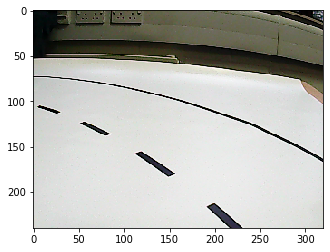

In [3]:
#Sample image and shape
sp0=plt.imread(os.path.join(os.path.join(cwd,'figtmp/training/Left'),os.listdir(os.path.join(cwd,'figtmp/training/Left'))[1]))
plt.imshow(sp0)
print(sp0.shape)

In [4]:
TRAINING_DIR=os.path.join(cwd,'figtmp/training/')
VALIDATION_DIR=os.path.join(cwd,'figtmp/testing/')
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    target_size=(240, 320))
validation_datagen = ImageDataGenerator(
      rescale=1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      fill_mode='nearest')
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=5,
                                                              class_mode='categorical',
                                                              target_size=(240, 320))

Found 150 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, (5, 5), activation='relu', input_shape=(240, 320, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(36, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(48, (5, 5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(optimizer = 'Adam',
              loss = 'categorical_crossentropy',
              metrics=['acc'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 236, 316, 24)      1824      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 118, 158, 24)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 114, 154, 36)      21636     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 57, 77, 36)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 73, 48)        43248     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 36, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 34, 64)        2

In [12]:
checkpoint_dir=os.path.join(cwd,'training_checkpoints')
checkpoint = tf.train.Checkpoint(model=model)
try:
    checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))
except:
    pass
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5
15/15 [==============================] - 18s 1s/step - loss: 0.3351 - acc: 0.8267 - val_loss: 0.3903 - val_acc: 0.8800
Epoch 2/5
15/15 [==============================] - 19s 1s/step - loss: 0.2973 - acc: 0.8600 - val_loss: 0.3175 - val_acc: 0.8800
Epoch 3/5
15/15 [==============================] - 19s 1s/step - loss: 0.2913 - acc: 0.8800 - val_loss: 0.3269 - val_acc: 0.9200
Epoch 4/5
15/15 [==============================] - 19s 1s/step - loss: 0.3131 - acc: 0.8800 - val_loss: 0.3275 - val_acc: 0.9200
Epoch 5/5
15/15 [==============================] - 19s 1s/step - loss: 0.2745 - acc: 0.8800 - val_loss: 0.2535 - val_acc: 0.9200


<Figure size 432x288 with 0 Axes>

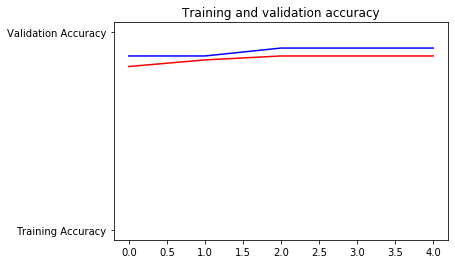

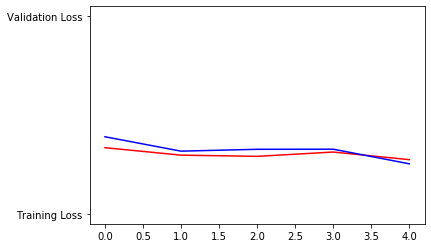

<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


# Desired output. Charts with training and validation metrics. No crash :)

In [14]:
try:
    os.mkdir(checkpoint_dir)
except OSError:
    pass
checkpoint_prefix=os.path.join(checkpoint_dir, 'ckpt')
checkpoint.save(file_prefix=checkpoint_prefix)

'/Users/xmxhuihui/Jupyter Notebook/Tensorflow/Self_Driving_Car_Project/training_checkpoints/ckpt-3'

In [15]:
model.evaluate(validation_generator)

5/5 [==============================] - 1s 225ms/step - loss: 0.3479 - acc: 0.9200


[0.34790566712617876, 0.92]